# Lower Versus Higher Poverty Counties (Virginia 2021)
---
In this section, determine if there are any differences in CoVID infection and vaccination rates between a lower and higher poverty counties in Virginia state in US using the 2021 poverty data available.

### Analysis base on findings
- Note that even though the poverty data was pulled using the 2021 data for Virginia versus the CoVID data was from 2022, the poverty data should relatively be the same for 2022 since the change in poverty rate would not change drastically within one year.
- Based on the observation below, there is a significant correlation between poverty correlates and vaccination rate (r=-0.35 p< 0.05) in the counties listed for Virginia. There is an overall increase in vaccination from lower poverty county to a higher poverty county. Even though there is not a lot of variation for the vaccination completed rate which could be due to the lack of reporting, the data is still signifcant.
- Additionally, the infection rates vs poverty rates showed a significant positive correlation (r= 0.49, p<0.05). Poverty does have a significant relationship with the infection rate. This could be due to the lack of medical supplies, facilities (hospital beds/treatment centers), and prevention.
- Finally, even though only counties from one state (VA) were sampled based on the poverty percentage within that state, the information found should provide a general understanding of how poverty can affect the outcome of infection and vaccination rates.

In [1]:
# Set up dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from pathlib import Path

In [2]:
# Load cleaned_va_poverty_covid_merged.csv dataset
file_covid_poverty = Path('../Outputs/cleaned_va_poverty_covid_merged.csv')
covid_poverty_df = pd.read_csv(file_covid_poverty)

# Display the df
covid_poverty_df

,fips,county,total poverty percentage,population,total cases,vaccination completed,vaccination completed ratio
0,51107,Loudoun,3.6,413538,98652,330884.0,0.800
1,51610,Falls Church,4.0,14617,3543,11828.0,0.809
2,51127,New Kent,4.9,23091,6015,15063.0,0.652
3,51199,York,5.1,68280,14008,58642.0,0.859
4,51179,Stafford,5.4,152882,42534,102448.0,0.670
...,...,...,...,...,...,...,...
128,51590,Danville,24.2,40044,14967,22273.0,0.556
129,51081,Greensville,24.4,11336,3928,6141.0,0.542
130,51660,Harrisonburg,25.0,53016,15367,29908.0,0.564
131,51105,Lee,25.1,23423,8538,11987.0,0.512


In [3]:
# Create two new columns, one for infection percentage and other for vaccination completed percentage to use for charting
covid_poverty_df['infection percentage'] = round(covid_poverty_df['total cases'] / covid_poverty_df['population'] * 100, 1)
covid_poverty_df['vaccination completed percentage'] = round(covid_poverty_df['vaccination completed ratio'] * 100, 1)

# Display the df
covid_poverty_df

,fips,county,total poverty percentage,population,total cases,vaccination completed,vaccination completed ratio,infection percentage,vaccination completed percentage
0,51107,Loudoun,3.6,413538,98652,330884.0,0.800,23.9,80.0
1,51610,Falls Church,4.0,14617,3543,11828.0,0.809,24.2,80.9
2,51127,New Kent,4.9,23091,6015,15063.0,0.652,26.0,65.2
3,51199,York,5.1,68280,14008,58642.0,0.859,20.5,85.9
4,51179,Stafford,5.4,152882,42534,102448.0,0.670,27.8,67.0
...,...,...,...,...,...,...,...,...,...
128,51590,Danville,24.2,40044,14967,22273.0,0.556,37.4,55.6
129,51081,Greensville,24.4,11336,3928,6141.0,0.542,34.7,54.2
130,51660,Harrisonburg,25.0,53016,15367,29908.0,0.564,29.0,56.4
131,51105,Lee,25.1,23423,8538,11987.0,0.512,36.5,51.2


## Locate top Lowest and Highest Poverty counties

In [4]:
# Sort the DF by ascending on poverty percentage to determine the lowest and hightest poverty counties and
# for charting graphs to make sure in case...
covid_poverty_sort_df = covid_poverty_df.sort_values('total poverty percentage', ascending = True)

# Extract the lowest and highest poverty counties into a new DF
lowest_pov_county = covid_poverty_sort_df.iloc[0, :]
highest_pov_county = covid_poverty_sort_df.iloc[-1, :]

print('Lowest Poverty County\n-------------------')
print(lowest_pov_county)
print()
print('Highest Poverty Count\n-------------------')
print(highest_pov_county)

Lowest Poverty County
-------------------
fips                                   51107
county                               Loudoun
total poverty percentage                 3.6
population                            413538
total cases                            98652
vaccination completed               330884.0
vaccination completed ratio              0.8
infection percentage                    23.9
vaccination completed percentage        80.0
Name: 0, dtype: object

Highest Poverty Count
-------------------
fips                                  51750
county                              Radford
total poverty percentage               25.6
population                            18249
total cases                            6468
vaccination completed                8826.0
vaccination completed ratio           0.484
infection percentage                   35.4
vaccination completed percentage       48.4
Name: 132, dtype: object


## Line Charts for Poverty vs Vaccination Completed and Infection Rates

In [5]:
# Presetup x and y data for plotting
x_axis = covid_poverty_df['total poverty percentage']
vaccination_percentage_y = covid_poverty_sort_df['vaccination completed percentage']
infection_percentage_y = covid_poverty_sort_df['infection percentage']

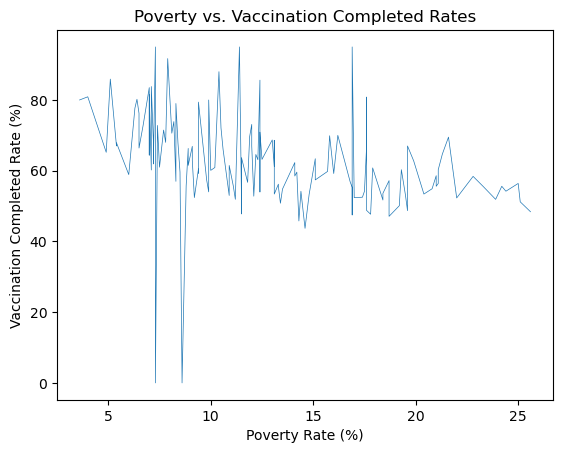

In [6]:
# Setup the line plot of poverty % vs. vaccination completed %
plt.plot(x_axis, vaccination_percentage_y, linewidth = 0.5, linestyle = '-')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Vaccination Completed Rate (%)')
plt.title('Poverty vs. Vaccination Completed Rates')

# Export the figure
plt.savefig('../Outputs/line_poverty_vs_vaccination.png')

# Show the plot
plt.show()

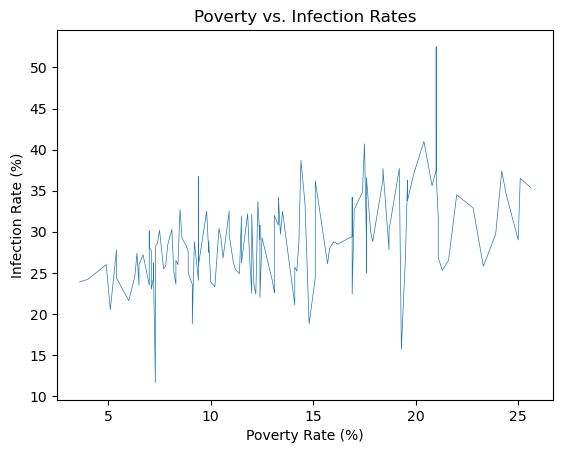

In [7]:
# Setup the line plot of poverty % vs. Infection %
plt.plot(x_axis, infection_percentage_y, linewidth = 0.5, linestyle = '-')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Infection Rate (%)')
plt.title('Poverty vs. Infection Rates')

# Export the figure
plt.savefig('../Outputs/line_poverty_vs_infection.png')

# Show the plot
plt.show()

## Linear Regression Plot for Poverty vs. Vaccination Completed

In [8]:
# Define regression plot function to be re-use
def plt_regression_line(x, y, xlabel, ylabel, scalar_value = [], export_fig = False):
    
    # Calculate the correlation coefficient and linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    
    # Calulate the regression value
    regress_values = x * slope + intercept
    
    # Setup the line_eq for use as label
    line_eq = f'y =  {round(slope, 2)}x + {round(intercept, 2)}'
    
    # Start the plotting of the chart
    if len(scalar_value) == len(x):
        plt.scatter(x, y, marker = 'o', s = scalar_value)
    else:
        plt.scatter(x, y)
    
    # Plot the regression line
    plt.plot(x, regress_values, 'r-', linewidth = 0.5, label = line_eq)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(fontsize = 12, loc = 'best')        

    # Print the p-value & r-value
    print(f'The r-value is: {rvalue}')
    print(f'The p-value is: {pvalue}')
    
    if export_fig == True:
        plt.savefig(f'../Outputs/regress_{xlabel}_vs_{ylabel}.png')
    
    # Show the chart
    plt.show()

The r-value is: -0.34633456285992137
The p-value is: 4.435496660342193e-05


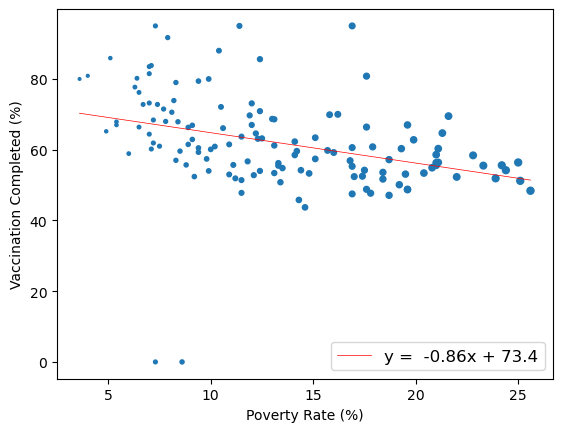

In [9]:
# Set scalar value using the poverty percentage
scalar_value = covid_poverty_sort_df['total poverty percentage']

# Call the line regression function for poverty vs vaccination completed percentages
xlabel = 'Poverty Rate (%)'
ylabel = 'Vaccination Completed (%)'

plt_regression_line(x_axis, vaccination_percentage_y, xlabel, ylabel, scalar_value = scalar_value, export_fig = True)

The r-value is: 0.4937212953849212
The p-value is: 1.5544161818921364e-09


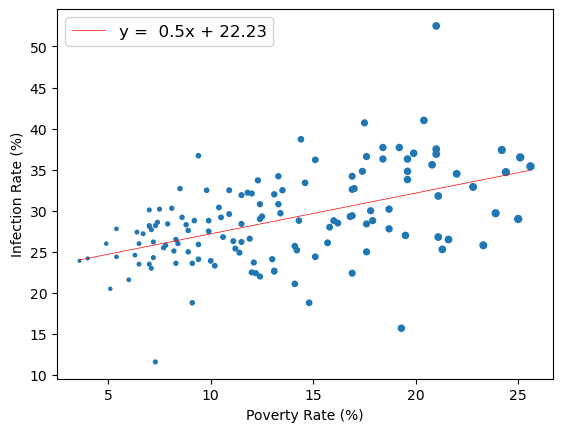

In [10]:
# Call the line regression function for poverty vs infection percentages
xlabel = 'Poverty Rate (%)'
ylabel = 'Infection Rate (%)'

plt_regression_line(x_axis, infection_percentage_y, xlabel, ylabel, scalar_value = scalar_value, export_fig = True)